<a href="https://colab.research.google.com/github/danielli-arcari/analisededados_populacaoprisionalMG_2017a2024/blob/main/analise_populacaoprisionalMG_2017_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da População Prisional de Minas Gerais (2017–2024)

## Contexto
Este projeto analisa dados da população prisional do estado de Minas Gerais
no período de 2017 a 2024, com foco em características como sexo e escolaridade.

A análise tem caráter exploratório e busca identificar padrões e tendências
ao longo do tempo.

## Objetivo
Responder às seguintes perguntas:
- Como evoluiu a população prisional ao longo dos anos?
- Qual a distribuição por sexo?
- Qual o nível de escolaridade predominante da população prisional?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/Notebooks_projetos/Dados Abertos_Pop_Pris_Sexo_Escolaridade_Jan_2017_Jun_2024.xlsx')
df.head(30)

,COD_OBSERVATORIO,NOME_ESTAB_PRISIONAL,COD_INSTITUICAO,INSTITUICAO,COD_IBGE,MUNICIPIO,COD_RISP,RISP,COD_SEXO,SEXO_NA_ADMISSAO,COD_ESCOLARIDADE_NA_ADMISSAO,ESCOLARIDADE_NA_ADMISSAO,ANO,MES_NUMERICO,CONTAGEM_IPL
0,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
1,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
2,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
3,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
4,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
5,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
6,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
7,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
8,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
9,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0


## Entendimento inicial dos dados

Nesta etapa, realizo uma inspeção inicial do conjunto de dados para:
- Entender sua dimensão.
- Identificar tipos de variáveis.
- Verificar dados ausentes ou inconsistentes.
- Garantir que não há duplicidades que prejudiquem a análise.


In [3]:
#Etapa1 - Inspecionando o dataframe:
#Verificando número de linhas e colunas:
df.shape

(328773, 15)

In [4]:
#Verificando tipo de dados:
df.dtypes

,0
COD_OBSERVATORIO,int64
NOME_ESTAB_PRISIONAL,object
COD_INSTITUICAO,int64
INSTITUICAO,object
COD_IBGE,int64
MUNICIPIO,object
COD_RISP,int64
RISP,object
COD_SEXO,int64
SEXO_NA_ADMISSAO,object


In [5]:
#verificando se há dados nulos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328773 entries, 0 to 328772
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   COD_OBSERVATORIO              328773 non-null  int64 
 1   NOME_ESTAB_PRISIONAL          328773 non-null  object
 2   COD_INSTITUICAO               328773 non-null  int64 
 3   INSTITUICAO                   328773 non-null  object
 4   COD_IBGE                      328773 non-null  int64 
 5   MUNICIPIO                     328773 non-null  object
 6   COD_RISP                      328773 non-null  int64 
 7   RISP                          328773 non-null  object
 8   COD_SEXO                      328773 non-null  int64 
 9   SEXO_NA_ADMISSAO              328773 non-null  object
 10  COD_ESCOLARIDADE_NA_ADMISSAO  328773 non-null  int64 
 11  ESCOLARIDADE_NA_ADMISSAO      328773 non-null  object
 12  ANO                           328773 non-null  int64 
 13 

In [6]:
df.describe(include='all')

,COD_OBSERVATORIO,NOME_ESTAB_PRISIONAL,COD_INSTITUICAO,INSTITUICAO,COD_IBGE,MUNICIPIO,COD_RISP,RISP,COD_SEXO,SEXO_NA_ADMISSAO,COD_ESCOLARIDADE_NA_ADMISSAO,ESCOLARIDADE_NA_ADMISSAO,ANO,MES_NUMERICO,CONTAGEM_IPL
count,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773.000000,328773.000000
unique,NaN,268,NaN,2,NaN,188,NaN,19,NaN,2,NaN,13,NaN,NaN,NaN
top,NaN,Penitenciária Prof. Aluízio Ignácio de Oliveira,NaN,DEPEN,NaN,Ribeirão das Neves,NaN,12ª RISP - Ipatinga,NaN,Masculino,NaN,1.Grau Incompleto,NaN,NaN,NaN
freq,NaN,2626,NaN,286254,NaN,11245,NaN,28882,NaN,253692,NaN,51110,NaN,NaN,NaN
mean,42693.587959,NaN,4.258653,NaN,313780.325088,NaN,9.558595,NaN,0.771633,NaN,14.404553,NaN,2020.240008,4.851527,18.775137
std,6681.311569,NaN,0.671123,NaN,2139.980429,NaN,5.098901,NaN,0.419781,NaN,29.346173,NaN,2.211549,3.824150,67.361858
min,40002.000000,NaN,4.000000,NaN,310020.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,2017.000000,1.000000,0.000000
25%,40074.000000,NaN,4.000000,NaN,311910.000000,NaN,5.000000,NaN,1.000000,NaN,3.000000,NaN,2018.000000,1.000000,1.000000
50%,40132.000000,NaN,4.000000,NaN,313900.000000,NaN,10.000000,NaN,1.000000,NaN,5.000000,NaN,2020.000000,4.000000,3.000000
75%,40200.000000,NaN,4.000000,NaN,315460.000000,NaN,14.000000,NaN,1.000000,NaN,7.000000,NaN,2022.000000,8.000000,11.000000


In [7]:
#Verificando se há dados ausentes:
df.isna().sum()

,0
COD_OBSERVATORIO,0
NOME_ESTAB_PRISIONAL,0
COD_INSTITUICAO,0
INSTITUICAO,0
COD_IBGE,0
MUNICIPIO,0
COD_RISP,0
RISP,0
COD_SEXO,0
SEXO_NA_ADMISSAO,0


In [8]:
df.columns

Index(['COD_OBSERVATORIO', 'NOME_ESTAB_PRISIONAL', 'COD_INSTITUICAO',
       'INSTITUICAO', 'COD_IBGE', 'MUNICIPIO', 'COD_RISP', 'RISP', 'COD_SEXO',
       'SEXO_NA_ADMISSAO', 'COD_ESCOLARIDADE_NA_ADMISSAO',
       'ESCOLARIDADE_NA_ADMISSAO', 'ANO', 'MES_NUMERICO', 'CONTAGEM_IPL'],
      dtype='object')

In [9]:
#verificando duplicatas:
df.duplicated().sum()

np.int64(44146)

In [10]:
df = df.drop_duplicates()

In [11]:
##Foram identificadas linhas duplicadas no conjunto de dados.
##Essas duplicatas foram removidas para evitar distorções nas análises estatísticas e nos gráficos.
##Este é o número de dados após a retirada das duplicações:
print(f"Número de registros após limpeza: {len(df)}")

Número de registros após limpeza: 284627


In [12]:
#padronizando o nome das colunas:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [13]:
df.columns

Index(['cod_observatorio', 'nome_estab_prisional', 'cod_instituicao',
       'instituicao', 'cod_ibge', 'municipio', 'cod_risp', 'risp', 'cod_sexo',
       'sexo_na_admissao', 'cod_escolaridade_na_admissao',
       'escolaridade_na_admissao', 'ano', 'mes_numerico', 'contagem_ipl'],
      dtype='object')

In [14]:
df.head(10)  # mostra as 10 primeiras linhas

,cod_observatorio,nome_estab_prisional,cod_instituicao,instituicao,cod_ibge,municipio,cod_risp,risp,cod_sexo,sexo_na_admissao,cod_escolaridade_na_admissao,escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
0,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
4,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
7,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
13,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,0
15,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,2
16,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,1
17,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,6
19,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,4
24,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,4,1.Grau Completo,2017,1,0
26,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,4,1.Grau Completo,2017,1,1


In [15]:
#verificando outliers:
df_desc = df.describe()
df_desc

,cod_observatorio,cod_instituicao,cod_ibge,cod_risp,cod_sexo,cod_escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
count,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000
mean,42746.885485,4.264016,313786.992604,9.569644,0.761505,13.908522,2020.205146,5.448903,21.485702
std,6739.840225,0.677000,2138.501808,5.098797,0.426164,28.612518,2.194741,3.772886,72.009122
min,40002.000000,4.000000,310020.000000,1.000000,0.000000,1.000000,2017.000000,1.000000,0.000000
25%,40074.000000,4.000000,311930.000000,5.000000,1.000000,3.000000,2018.000000,2.000000,1.000000
50%,40132.000000,4.000000,313900.000000,10.000000,1.000000,5.000000,2020.000000,5.000000,4.000000
75%,40201.000000,4.000000,315460.000000,14.000000,1.000000,7.000000,2022.000000,9.000000,14.000000
max,60066.000000,6.000000,317200.000000,19.000000,1.000000,99.000000,2024.000000,12.000000,1422.000000


In [16]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers[col] = outlier_count

# Mostrar resultado
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

cod_observatorio: 37573 outliers
cod_instituicao: 37573 outliers
cod_ibge: 0 outliers
cod_risp: 0 outliers
cod_sexo: 67882 outliers
cod_escolaridade_na_admissao: 28777 outliers
ano: 0 outliers
mes_numerico: 0 outliers
contagem_ipl: 36287 outliers


## Evolução da população prisional ao longo do tempo

Nesta análise, observo como a população prisional se comportou entre 2017 e 2024,
buscando identificar tendências de crescimento, queda ou estabilidade.

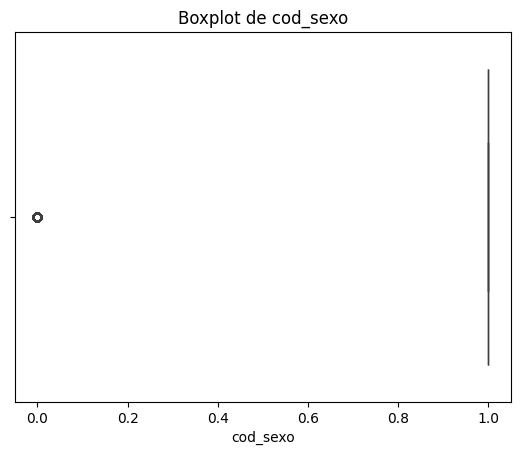

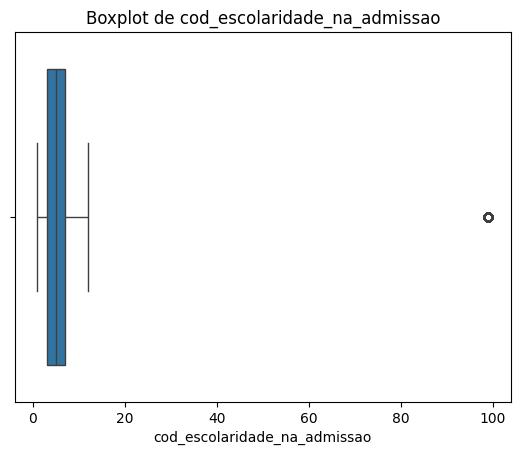

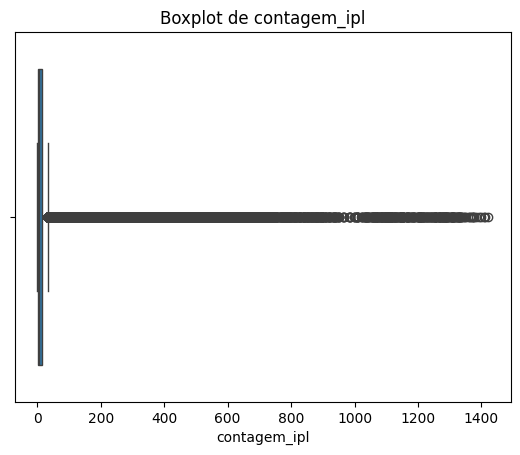

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['cod_sexo', 'cod_escolaridade_na_admissao', 'contagem_ipl']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [38]:
#filtrar e remover outliers:
## iqr = Q3 - Q1
df_desc.loc["IQR"] = df_desc.loc["75%"] - df_desc.loc["25%"]

df_desc

,cod_observatorio,cod_instituicao,cod_ibge,cod_risp,cod_sexo,cod_escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
count,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000
mean,42746.885485,4.264016,313786.992604,9.569644,0.761505,13.908522,2020.205146,5.448903,21.485702
std,6739.840225,0.677000,2138.501808,5.098797,0.426164,28.612518,2.194741,3.772886,72.009122
min,40002.000000,4.000000,310020.000000,1.000000,0.000000,1.000000,2017.000000,1.000000,0.000000
25%,40074.000000,4.000000,311930.000000,5.000000,1.000000,3.000000,2018.000000,2.000000,1.000000
50%,40132.000000,4.000000,313900.000000,10.000000,1.000000,5.000000,2020.000000,5.000000,4.000000
75%,40201.000000,4.000000,315460.000000,14.000000,1.000000,7.000000,2022.000000,9.000000,14.000000
max,60066.000000,6.000000,317200.000000,19.000000,1.000000,99.000000,2024.000000,12.000000,1422.000000
IQR,127.000000,0.000000,3530.000000,9.000000,0.000000,4.000000,4.000000,7.000000,13.000000


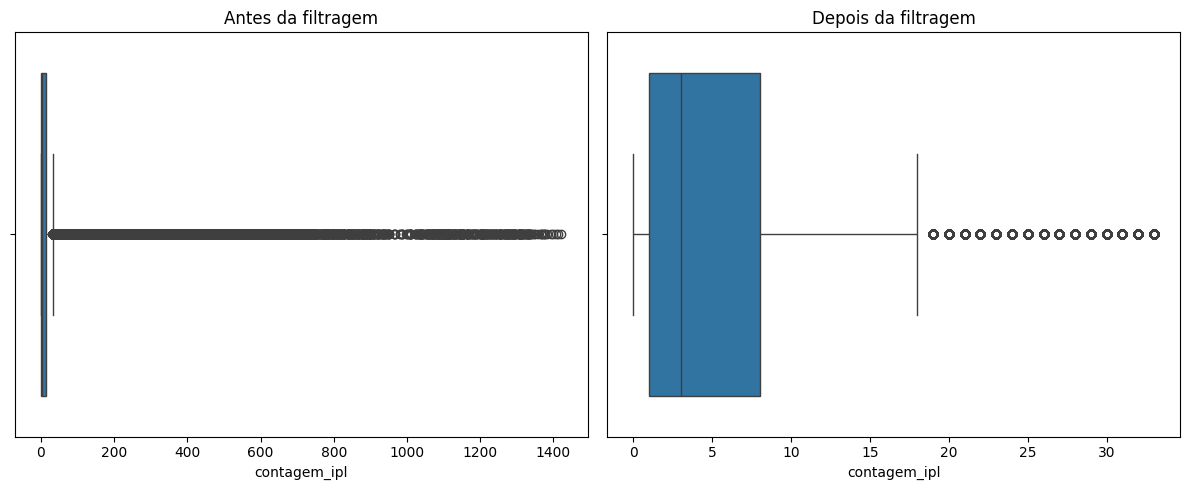

In [40]:
Q1 = df['contagem_ipl'].quantile(0.25)
Q3 = df['contagem_ipl'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtrado = df[(df['contagem_ipl'] >= lower_bound) & (df['contagem_ipl'] <= upper_bound)]

# Comparando antes e depois
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['contagem_ipl'], ax=axes[0])
axes[0].set_title('Antes da filtragem')

sns.boxplot(x=df_filtrado['contagem_ipl'], ax=axes[1])
axes[1].set_title('Depois da filtragem')

plt.tight_layout()
plt.show()

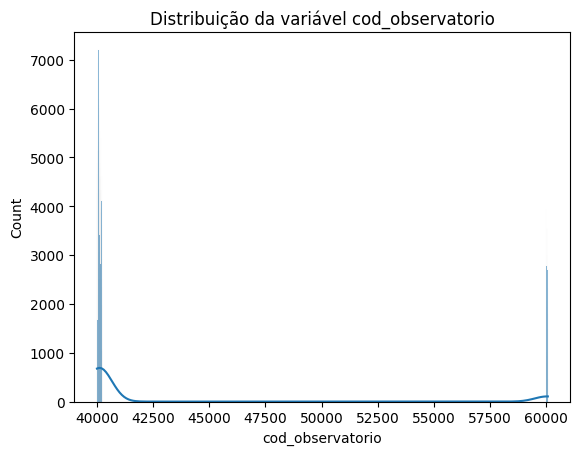

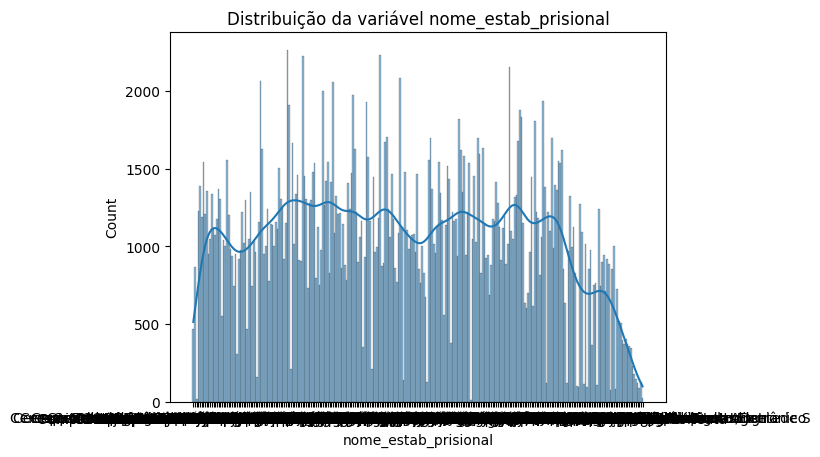

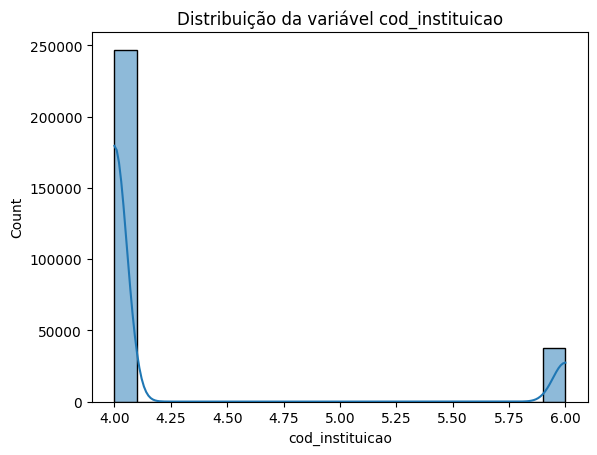

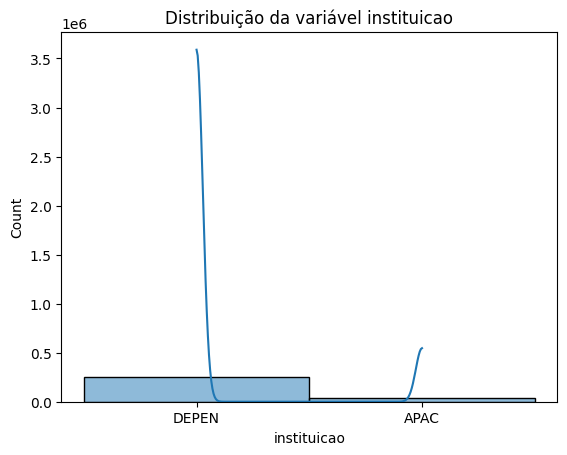

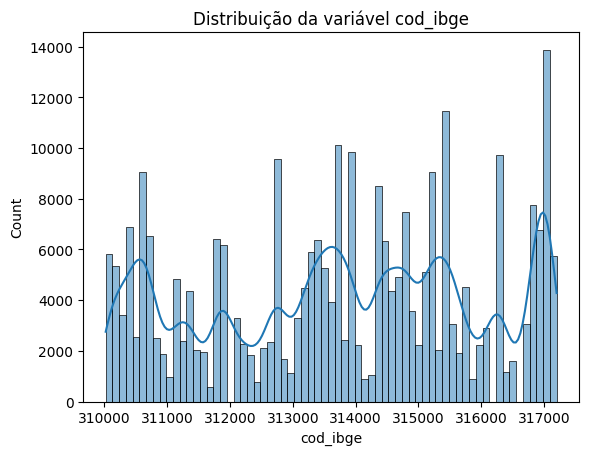

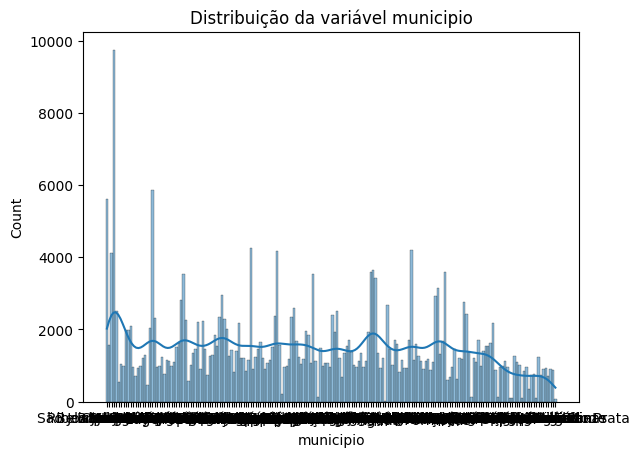

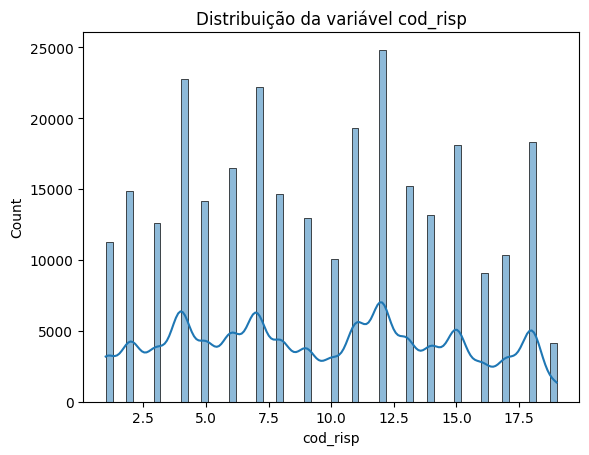

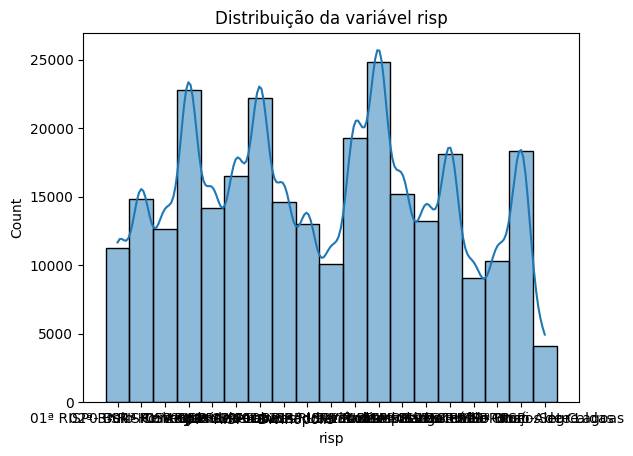

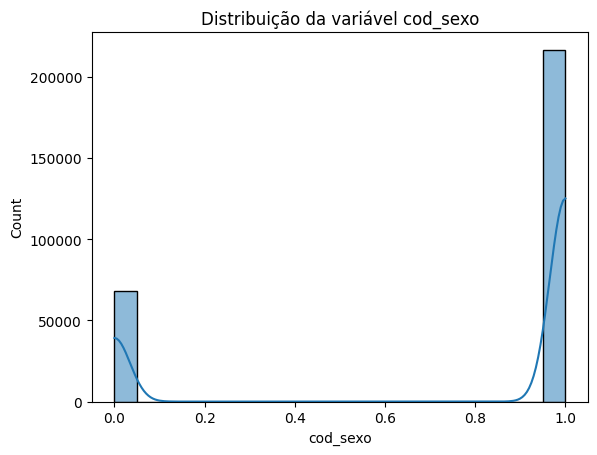

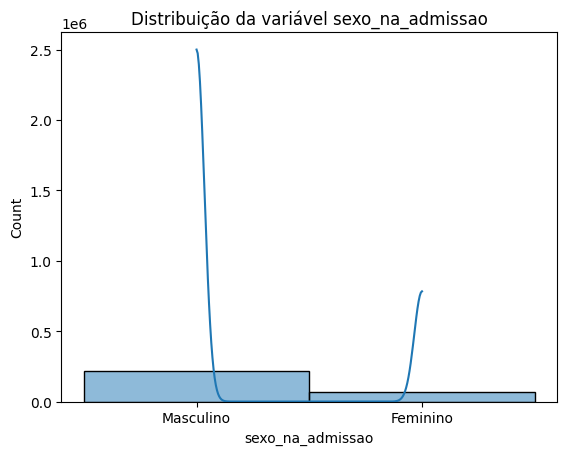

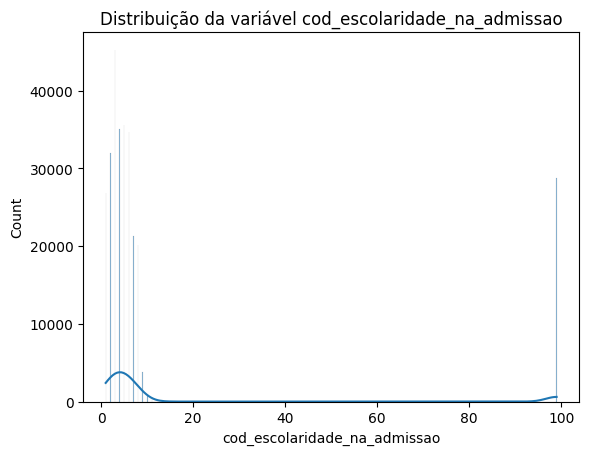

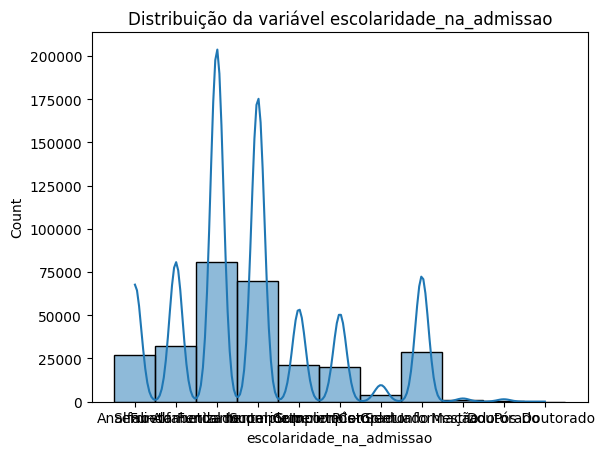

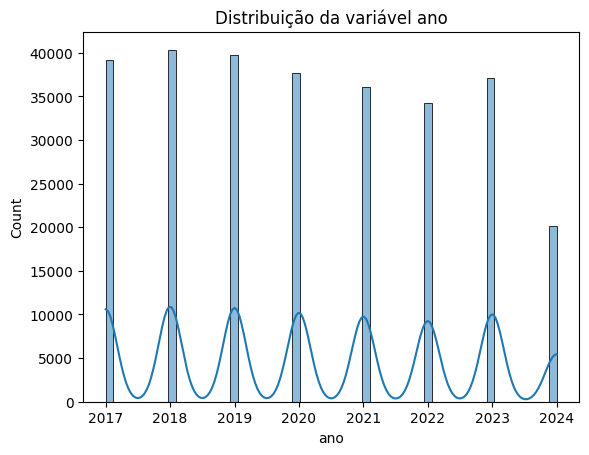

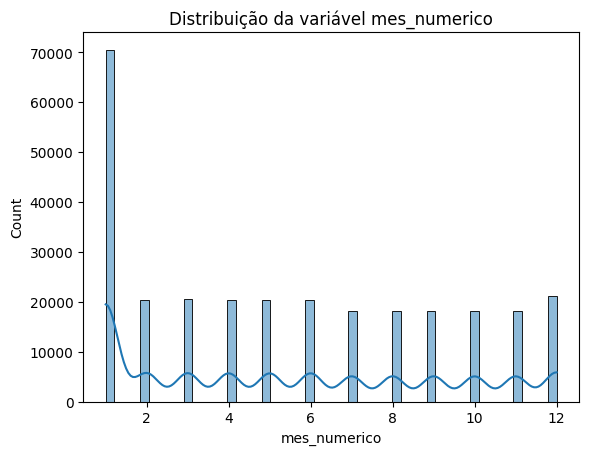

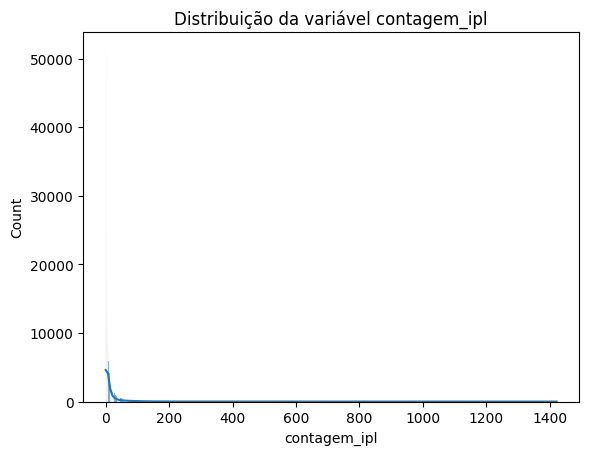

In [41]:
# visualizando distribuições com histogramas para ter intuição quanto a outliers
for col in df:

    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

## Escolaridade da população prisional

Aqui analiso o nível de escolaridade da população prisional,
buscando identificar o grau de acesso à educação entre as pessoas privadas de liberdade.


In [43]:
print(df['escolaridade_na_admissao'].value_counts())

escolaridade_na_admissao
Fundamental Incompleto    80886
Fundamental Completo      69755
Semi-Alfabetizado         31989
Sem Informação            28777
Analfabeto                26813
Superior Incompleto       21234
Superior Completo         20146
Pós-Graduado               3784
Mestrado                    711
Doutorado                   531
Pós-Doutorado                 1
Name: count, dtype: int64


In [44]:
print(df.columns.tolist())

['cod_observatorio', 'nome_estab_prisional', 'cod_instituicao', 'instituicao', 'cod_ibge', 'municipio', 'cod_risp', 'risp', 'cod_sexo', 'sexo_na_admissao', 'cod_escolaridade_na_admissao', 'escolaridade_na_admissao', 'ano', 'mes_numerico', 'contagem_ipl']


In [45]:
df['escolaridade_na_admissao'] = df['escolaridade_na_admissao'].str.strip().str.title()

df['escolaridade_na_admissao'] = df['escolaridade_na_admissao'].replace({
    '1.Grau Incompleto': 'Fundamental Incompleto',
    '2.Grau Incompleto': 'Fundamental Incompleto',
    '1.Grau Completo': 'Fundamental Completo',
    '2.Grau Completo': 'Fundamental Completo',
    'Semi-Alfabetizado': 'Semi-Alfabetizado',
    'Sem Informação': 'Sem Informação',
    'Analfabeto': 'Analfabeto',
    'Superior Incompleto': 'Superior Incompleto',
    'Superior Completo': 'Superior Completo',
    'Pós-Graduado': 'Pós-Graduado',
    'Pos Doutorado': 'Pós-Doutorado',
    'Mestrado': 'Mestrado',
    'Doutorado': 'Doutorado'
})


In [46]:
df['escolaridade_na_admissao'].value_counts()

,count
escolaridade_na_admissao,
Fundamental Incompleto,80886
Fundamental Completo,69755
Semi-Alfabetizado,31989
Sem Informação,28777
Analfabeto,26813
Superior Incompleto,21234
Superior Completo,20146
Pós-Graduado,3784
Mestrado,711


In [29]:
escolaridade_counts = df['escolaridade_na_admissao'].value_counts()


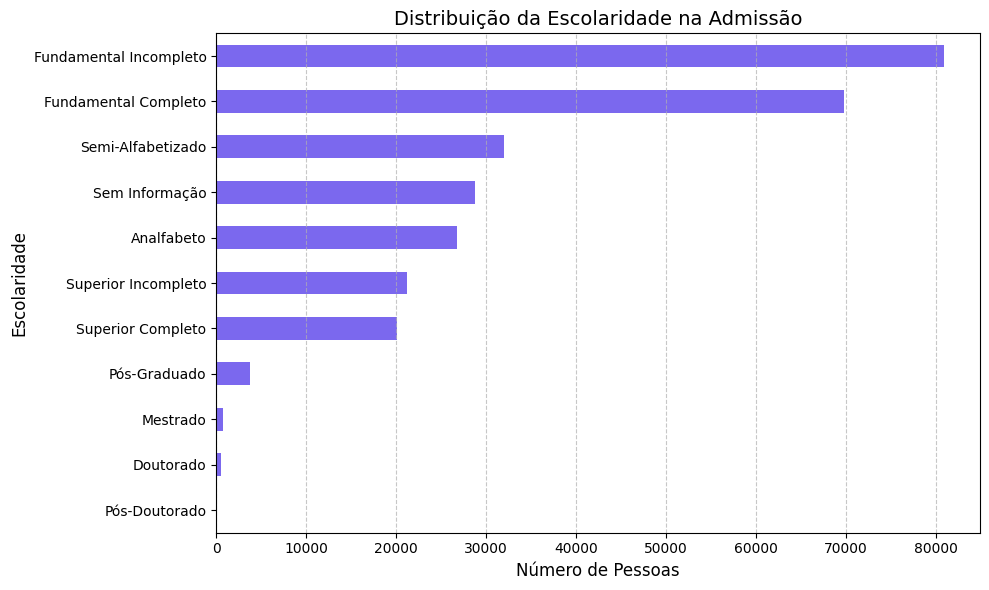

In [30]:
# Criar gráfico de barras horizontal
plt.figure(figsize=(10, 6))
escolaridade_counts.plot(kind='barh', color='mediumslateblue')

# Títulos e rótulos
plt.title('Distribuição da Escolaridade na Admissão', fontsize=14)
plt.xlabel('Número de Pessoas', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)
plt.gca().invert_yaxis()  # Coloca a maior categoria no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
print(df['instituicao'].value_counts())

instituicao
DEPEN    247054
APAC      37573
Name: count, dtype: int64


In [48]:
# Contagem das instituições
instituicoes = df['instituicao'].value_counts()


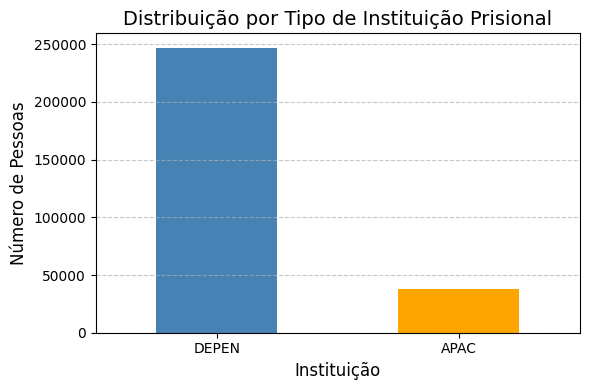

In [49]:
# Gráfico de barras
plt.figure(figsize=(6, 4))
instituicoes.plot(kind='bar', color=['steelblue', 'orange'])

# Títulos e rótulos
plt.title('Distribuição por Tipo de Instituição Prisional', fontsize=14)
plt.xlabel('Instituição', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
#Cruzando informações:
tabela_cruzada = df.groupby(['instituicao', 'escolaridade_na_admissao']).size().unstack().fillna(0)
tabela_cruzada

escolaridade_na_admissao,Analfabeto,Doutorado,Fundamental Completo,Fundamental Incompleto,Mestrado,Pós-Doutorado,Pós-Graduado,Sem Informação,Semi-Alfabetizado,Superior Completo,Superior Incompleto
instituicao,,,,,,,,,,,
APAC,3367.0,96.0,9352.0,10883.0,96.0,0.0,409.0,3289.0,4286.0,2881.0,2914.0
DEPEN,23446.0,435.0,60403.0,70003.0,615.0,1.0,3375.0,25488.0,27703.0,17265.0,18320.0


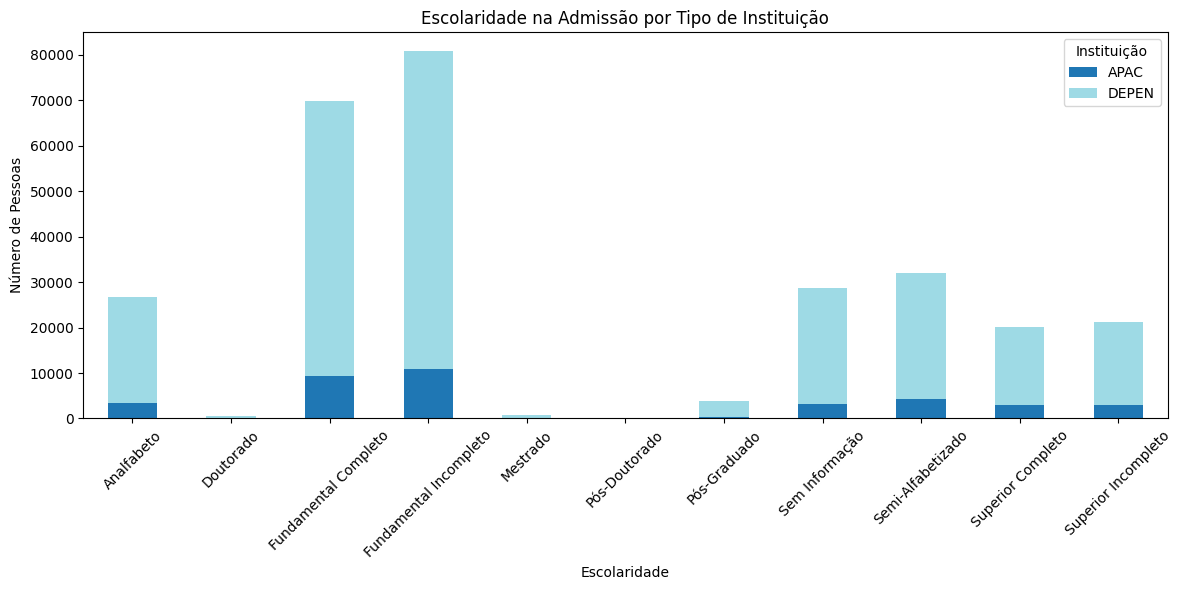

In [51]:
#Gráfico com as informações cruzadas:
tabela_cruzada.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title('Escolaridade na Admissão por Tipo de Instituição')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Pessoas')
plt.legend(title='Instituição')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight
Observa-se que os níveis mais baixos de escolaridade concentram a maior parte da população prisional,
o que sugere uma possível relação entre baixa escolaridade e vulnerabilidade social.


## Distribuição da população prisional por sexo

Nesta etapa, analiso a composição da população prisional por sexo,
com o objetivo de identificar a proporção entre homens e mulheres
no sistema prisional de Minas Gerais ao longo do período analisado.


In [54]:
#Verificando valores únicos e inconsistências:
print(df['sexo_na_admissao'].value_counts())

sexo_na_admissao
Masculino    216745
Feminino      67882
Name: count, dtype: int64


<Axes: title={'center': 'Distribuição da População Prisional por Sexo'}, xlabel='sexo_na_admissao'>

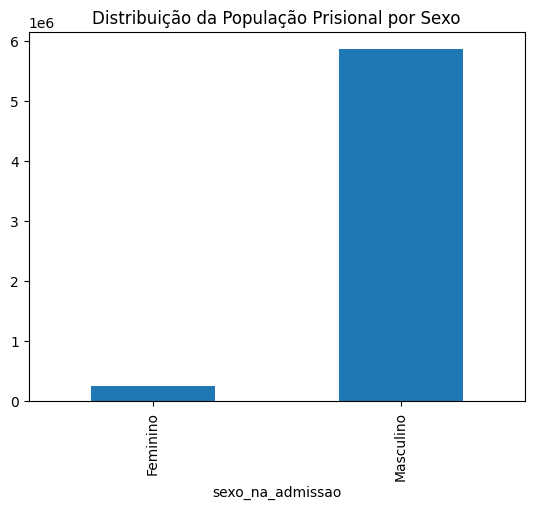

In [53]:
df_sexo = df.groupby('sexo_na_admissao')['contagem_ipl'].sum()
df_sexo.plot(kind='bar', title='Distribuição da População Prisional por Sexo')

### Insight

Os dados indicam que a população prisional é majoritariamente composta
por pessoas do sexo masculino, enquanto a participação feminina é
significativamente menor durante todo o período analisado.

Essa diferença sugere uma forte desigualdade de gênero no sistema prisional,
o que é consistente com dados nacionais e internacionais.
